In [1]:
# export full genome
from pybedtools import genome_registry, chromsizes_to_file, chromsizes
chromsizes_to_file(chromsizes('hg19'), '../download/genome/hg19.genome')

'../download/genome/hg19.genome'

In [2]:
assembly_path = "../download/genome/hg19_reduced.genome"

In [3]:
import pandas as pd
import numpy as np
from pybedtools import BedTool

In [4]:
store = pd.HDFStore("../storage/encode_overlaps.hdf")
store_repeat = pd.HDFStore("../storage/repeatmasker_staging.hdf")

In [5]:
store.keys()

['/filtered_hg19_DNase_H3K27ac_FANTOM_overlapped',
 '/filtered_hg19_DNase_H3K27ac_FANTOM_overlapped_bed']

In [6]:
store_repeat.keys()

['/DNA',
 '/DNA_Kolobok',
 '/DNA_Kolobok_bed',
 '/DNA_MULE_MuDR',
 '/DNA_MULE_MuDR_bed',
 '/DNA_Merlin',
 '/DNA_Merlin_bed',
 '/DNA_PIF_Harbinger',
 '/DNA_PIF_Harbinger_bed',
 '/DNA_PiggyBac',
 '/DNA_PiggyBac_bed',
 '/DNA_TcMar',
 '/DNA_TcMar_Mariner',
 '/DNA_TcMar_Mariner_bed',
 '/DNA_TcMar_Pogo',
 '/DNA_TcMar_Pogo_bed',
 '/DNA_TcMar_Tc1',
 '/DNA_TcMar_Tc1_bed',
 '/DNA_TcMar_Tc2',
 '/DNA_TcMar_Tc2_bed',
 '/DNA_TcMar_Tigger',
 '/DNA_TcMar_Tigger_bed',
 '/DNA_TcMar_bed',
 '/DNA_TcMar_qm',
 '/DNA_TcMar_qm_bed',
 '/DNA_bed',
 '/DNA_hAT',
 '/DNA_hAT_Ac',
 '/DNA_hAT_Ac_bed',
 '/DNA_hAT_Blackjack',
 '/DNA_hAT_Blackjack_bed',
 '/DNA_hAT_Charlie',
 '/DNA_hAT_Charlie_bed',
 '/DNA_hAT_Tag1',
 '/DNA_hAT_Tag1_bed',
 '/DNA_hAT_Tip100',
 '/DNA_hAT_Tip100_bed',
 '/DNA_hAT_Tip100_qm',
 '/DNA_hAT_Tip100_qm_bed',
 '/DNA_hAT_bed',
 '/DNA_hAT_qm',
 '/DNA_hAT_qm_bed',
 '/DNA_qm',
 '/DNA_qm_PiggyBac_qm',
 '/DNA_qm_PiggyBac_qm_bed',
 '/DNA_qm_bed',
 '/DNA_qm_hAT_Tip100_qm',
 '/DNA_qm_hAT_Tip100_qm_bed',
 '/L

In [7]:
store.close()
store_repeat.close()

In [8]:
encode_metadata = pd.read_hdf("../storage/encode_staging.hdf", "encode_metadata")

In [91]:
encode_metadata.query("assembly == 'hg19' & biosample_type=='tissue'")['biosample_term_name'].unique()

array(['large intestine', 'stomach', 'brain', 'adrenal gland', 'amnion',
       'placenta', 'urinary bladder', 'skeletal muscle tissue',
       'muscle layer of duodenum', 'thymus', 'heart', 'eye',
       'small intestine', 'muscle of leg', 'tongue', 'umbilical cord',
       'lung', 'pancreas', 'female gonad', 'psoas muscle',
       'heart left ventricle', 'layer of hippocampus',
       'middle frontal area 46', 'muscle of trunk', 'cingulate gyrus',
       'midbrain', 'globus pallidus', 'substantia nigra',
       'middle frontal gyrus', 'heart right ventricle', 'mucosa of rectum',
       'temporal lobe', 'endocrine pancreas', 'caudate nucleus', 'liver',
       'angular gyrus', 'muscle layer of colon', 'sigmoid colon',
       'colonic mucosa', 'aorta', 'spleen', 'spinal cord',
       'rectal smooth muscle tissue', 'stomach smooth muscle',
       'right cardiac atrium', 'kidney', 'left kidney', 'esophagus'], dtype=object)

In [93]:
encode_metadata.query("assembly == 'hg19' & biosample_term_name == 'placenta' & method=='DNase_H3K27ac'")

,accession,assembly,biosample_term_id,biosample_term_name,biosample_type,description,developmental_slims,encyclopedia_version,month_released,organ_slims,organism,system_slims,bed_filename,bed_filepath,merged,method
67,ENCSR378TPC,hg19,UBERON:0001987,placenta,tissue,Enhancer-like regions using DNase and H3K27ac ...,[mesoderm],3,"June, 2016","[placenta,extraembryonic structure]",/organisms/human/,[reproductive system],ENCFF447DLF.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,DNase_H3K27ac


In [1]:
encode_bed = BedTool("../download/ENCODE/ENCSR378TPC/files/ENCFF447DLF/ENCFF447DLF.bed.gz")
encode_bed.count()

NameError: name 'BedTool' is not defined

In [69]:
repeat_bed_df = pd.read_hdf("../storage/repeatmasker_staging.hdf", "SINE_MIR_bed")
repeat_bed = BedTool().from_dataframe(repeat_bed_df)

In [70]:
encode_bed.count()

36772

In [71]:
repeat_bed.count()

594372

In [72]:
repeat_bed.to_dataframe()['chrom'].unique()

array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chrX',
       'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
       'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chrY', 'chr19',
       'chr22', 'chr21'], dtype=object)

In [73]:
encode_bed_df = encode_bed.to_dataframe()

In [74]:
# removing chroms
chroms = encode_bed_df['chrom'].unique()
repeat_bed = BedTool().from_dataframe(repeat_bed_df.query('chrom in @chroms'))

In [75]:
repeat_bed.count()

593160

### MIR size distribution

In [76]:
def compute_size(row, prefix=None):
    col_name = prefix + '_name' if prefix else 'name'
    if row[col_name] == '.':
        return 0
    col_end = prefix + '_end' if prefix else 'end'
    col_start = prefix + '_start' if prefix else 'start'
    size = abs(row[col_end] - row[col_start])
    return size

In [77]:
# MIR size
repeat_bed_df = repeat_bed.to_dataframe()
repeat_bed_df['size'] = repeat_bed_df.apply(lambda row: compute_size(row), axis=1)

In [78]:
encode_bed_df['size'] = encode_bed_df.apply(lambda row: compute_size(row), axis=1)

In [87]:
fantom_bed_df = fantom_bed.to_dataframe()
fantom_bed_df['size'] = fantom_bed_df.apply(lambda row: compute_size(row), axis=1)
encode_bed_df['size'] = encode_bed_df.apply(lambda row: compute_size(row), axis=1)

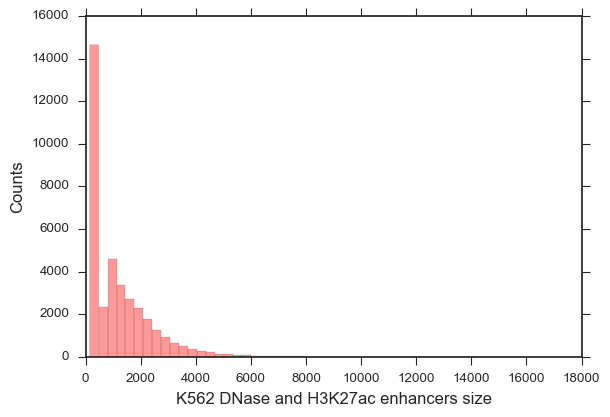

In [89]:
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("paper", font_scale=1.2, rc={"lines.linewidth": 2})
ax = sns.distplot(encode_bed_df[['size']], kde=False, color='red')
ax.set_ylabel('Counts', size=12)
ax.set_xlabel('K562 DNase and H3K27ac enhancers size', size=12)

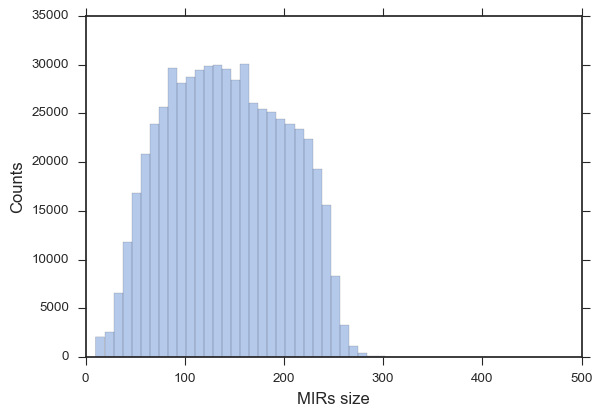

In [80]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("paper", font_scale=1.2, rc={"lines.linewidth": 2})
ax = sns.distplot(repeat_bed_df[['size']], kde=False)

ax.set_ylabel('Counts', size=12)
ax.set_xlabel('MIRs size', size=12)

## Full MIR in enhancer

In [81]:
real_count = encode_bed.intersect(repeat_bed, F=1).count()
real_count

10209

In [82]:
repeat_bed.intersect(encode_bed, f=1).count()

10209

In [83]:
encode_bed.sort().fisher(repeat_bed.sort(), F=1, g=assembly_path)

<FisherOutput at 4766326064>
# Number of query intervals: 36772
# Number of db intervals: 593104
# Number of overlaps: 10209
# Number of possible intervals (estimated): 2305424
# phyper(10209 - 1, 36772, 2305424 - 36772, 593104, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 10209        | 26563        |
# not in -a | 582895       | 1685757      |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
1	2.1752e-19	4.2103e-19	1.112

In [84]:
encode_bed.sort().jaccard(repeat_bed.sort(), F=1, g=assembly_path)

{'intersection': 1331670,
 'jaccard': 0.0104801,
 'n_intersections': 10026,
 'union-intersection': 127066206}

### Null Model 1: shuffled enhancers

In [30]:
def compare_null_model(counts, real_count):
    print("mean:", np.mean(counts), "std:", np.std(counts))
    import seaborn as sns
    %matplotlib inline
    import scipy.stats as st
    sns.distplot(counts, kde=False, fit=st.norm, bins=20)
    z_score =(real_count - np.mean(counts))/np.std(counts)
    p_values = st.norm.sf(abs(z_score))
    print("z-score:", z_score, "p-value:",p_values)

In [31]:
def build_shuffled_full_overlap(bed, bed_overlap_with, assembly_path):
    shuffled_bed = bed.shuffle(g=assembly_path)
    core_null_model_intersection = shuffled_bed.intersect(bed_overlap_with, F=1)
    return core_null_model_intersection.count()

In [32]:
from joblib import Parallel, delayed
import multiprocessing
counts = []
num_cores = multiprocessing.cpu_count()
counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_full_overlap)
                                             (encode_bed, repeat_bed, assembly_path)
                                             for i in range(0, 100)))

mean: 146.72 std: 11.2036422649
z-score: 4.57708295102 p-value: 2.35752265406e-06


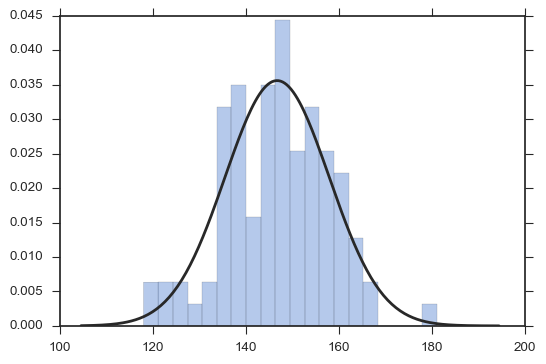

In [33]:
compare_null_model(counts, real_count)

### Null Model 2: shuffled repeats

In [34]:
def build_shuffled_full_overlap_with(bed, bed_overlap_with, assembly_path):
    shuffled_bed_with = bed_overlap_with.shuffle(g=assembly_path)
    core_null_model_intersection = bed.intersect(shuffled_bed_with, F=1)
    return core_null_model_intersection.count()

In [35]:
from joblib import Parallel, delayed
import multiprocessing
counts = []
num_cores = multiprocessing.cpu_count()
counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_full_overlap_with)
                                             (encode_bed, repeat_bed, assembly_path)
                                             for i in range(0, 100)))

mean: 146.05 std: 13.7893981014
z-score: 3.76738706199 p-value: 8.24825646955e-05


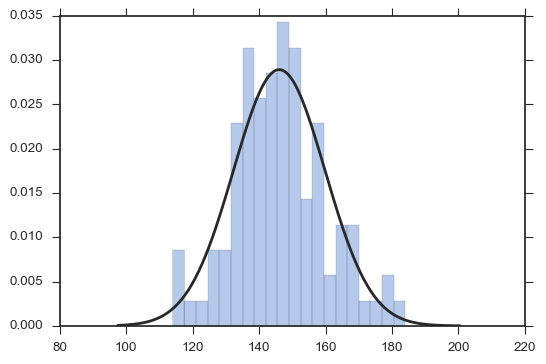

In [36]:
compare_null_model(counts, real_count)

### Null Model 3: shuffled on shuffled

In [37]:
def build_shuffled_on_shuffled_full_overlap(bed, bed_overlap_with, assembly_path):
    shuffled_bed = bed.shuffle(g=assembly_path)
    shuffled_bed_with = bed_overlap_with.shuffle(g=assembly_path)
    core_null_model_intersection = shuffled_bed.intersect(shuffled_bed_with, F=1)
    return core_null_model_intersection.count()

In [38]:
from joblib import Parallel, delayed
import multiprocessing
counts = []
num_cores = multiprocessing.cpu_count()
counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_on_shuffled_full_overlap)
                                             (encode_bed, repeat_bed, assembly_path)
                                             for i in range(0, 100)))

mean: 147.47 std: 12.0311720127
z-score: 4.19992332804 p-value: 1.33502690239e-05


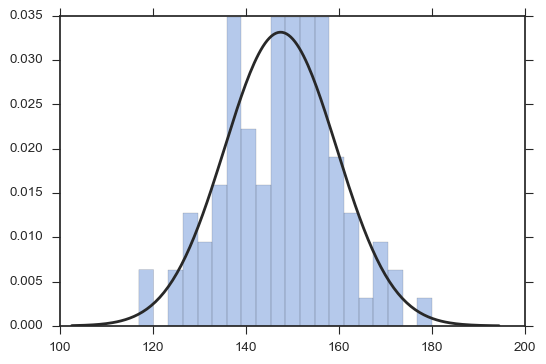

In [39]:
compare_null_model(counts, real_count)

## Counting occurences per enhancer

In [40]:
encode_bed = BedTool().from_dataframe(
    encode_bed.to_dataframe()[['chrom', 'start', 'end', 'name', 'score', 'strand']])

In [41]:
overlap_occurences_df = encode_bed.intersect(repeat_bed, F=1, c=True).to_dataframe()
overlap_occurences_null_df = encode_bed.shuffle(g=assembly_path).intersect(repeat_bed, F=1, c=True).to_dataframe()
overlap_occurences_null_2_df = encode_bed.intersect(repeat_bed.shuffle(g=assembly_path), F=1, c=True).to_dataframe()
overlap_occurences_null_3_df = encode_bed.shuffle(g=assembly_path).intersect(repeat_bed.shuffle(g=assembly_path), F=1, c=True).to_dataframe()
overlap_occurences_complement_df = encode_bed.sort().complement(g=assembly_path).intersect(repeat_bed, F=1, c=True).to_dataframe()

In [42]:
occ_cols = ['chrom', 'start', 'end', 'name', 'score', 'strand', 'occurences']
overlap_occurences_df.columns = occ_cols
overlap_occurences_null_df.columns = occ_cols
overlap_occurences_null_2_df.columns = occ_cols
overlap_occurences_null_3_df.columns = occ_cols
overlap_occurences_complement_df.columns = ['chrom', 'start', 'end', 'occurences']

In [43]:
occurences = overlap_occurences_df.query("occurences > 0")['occurences'].tolist()
occurences_null = overlap_occurences_null_df.query("occurences > 0")['occurences'].tolist()
occurences_null_2 = overlap_occurences_null_2_df.query("occurences > 0")['occurences'].tolist()
occurences_null_3 = overlap_occurences_null_3_df.query("occurences > 0")['occurences'].tolist()
occurences_complement = overlap_occurences_complement_df.query("occurences > 0")['occurences'].tolist()

In [44]:
occ_freq, occ_base = np.histogram(occurences, bins=range(1,26))
occ_freq_null, _ = np.histogram(occurences_null, bins=range(1,26))
occ_freq_null_2, _ = np.histogram(occurences_null_2, bins=range(1,26))
occ_freq_null_3, _ = np.histogram(occurences_null_3, bins=range(1,26))
occ_freq_complement, _ = np.histogram(occurences_complement, bins=range(1,26))

occ_ratio = occ_freq / sum(occ_freq)
occ_ratio_null = occ_freq_null / sum(occ_freq_null)
occ_ratio_null_2 = occ_freq_null_2 / sum(occ_freq_null_2)
occ_ratio_null_3 = occ_freq_null_3 / sum(occ_freq_null_3)
occ_ratio_complement = occ_freq_complement / sum(occ_freq_complement)

NameError: name 'test_z_df' is not defined

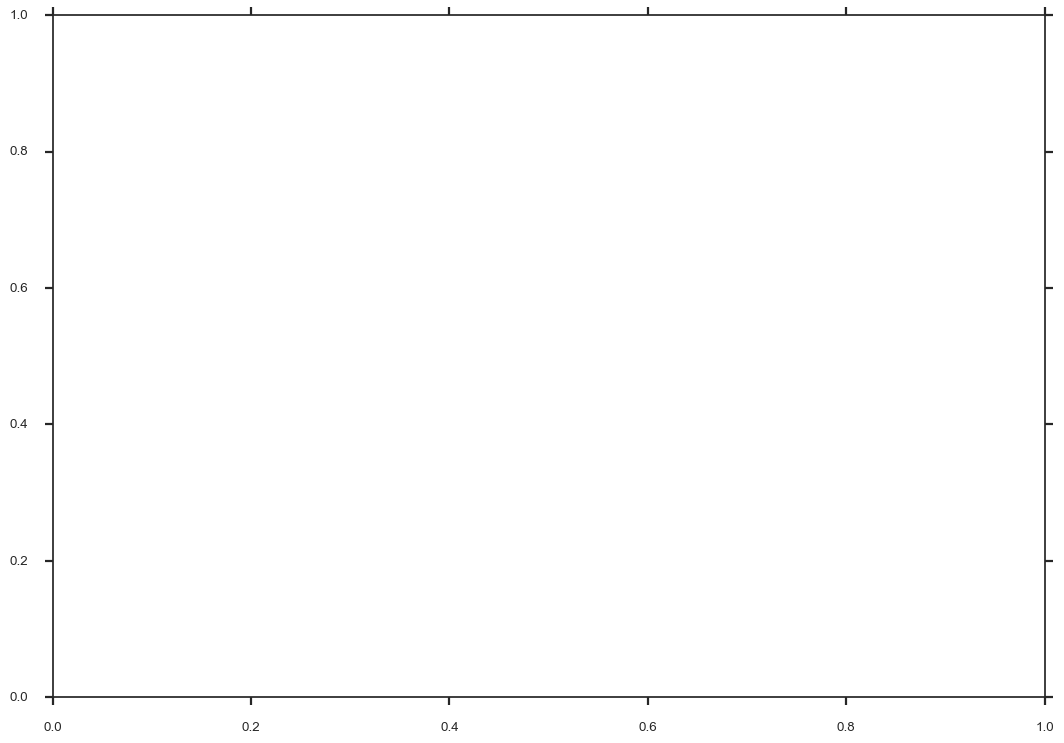

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 2})

fig = plt.figure()
ax = fig.add_subplot(111)
g = plt.plot(test_z_df['min_ovlp'], test_z_df['log_z_random'], c='blue')
g = plt.plot(test_z_df['min_ovlp'], test_z_df['log_z_shuffled'], c='red')
plt.grid()

ax.axes.set_ylim(5, 6.5)
ax.set_xlabel('Minimum overlap fraction', size=16)
ax.set_ylabel('z score', size=16)
for tick in ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(12) 
        
for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(12) 

green_patch = mpatches.Patch(color='blue', label='Random null model')
blue_patch = mpatches.Patch(color='red', label='Shuffled null model')

plt.legend(handles=[green_patch, blue_patch], fontsize=14, loc=1)

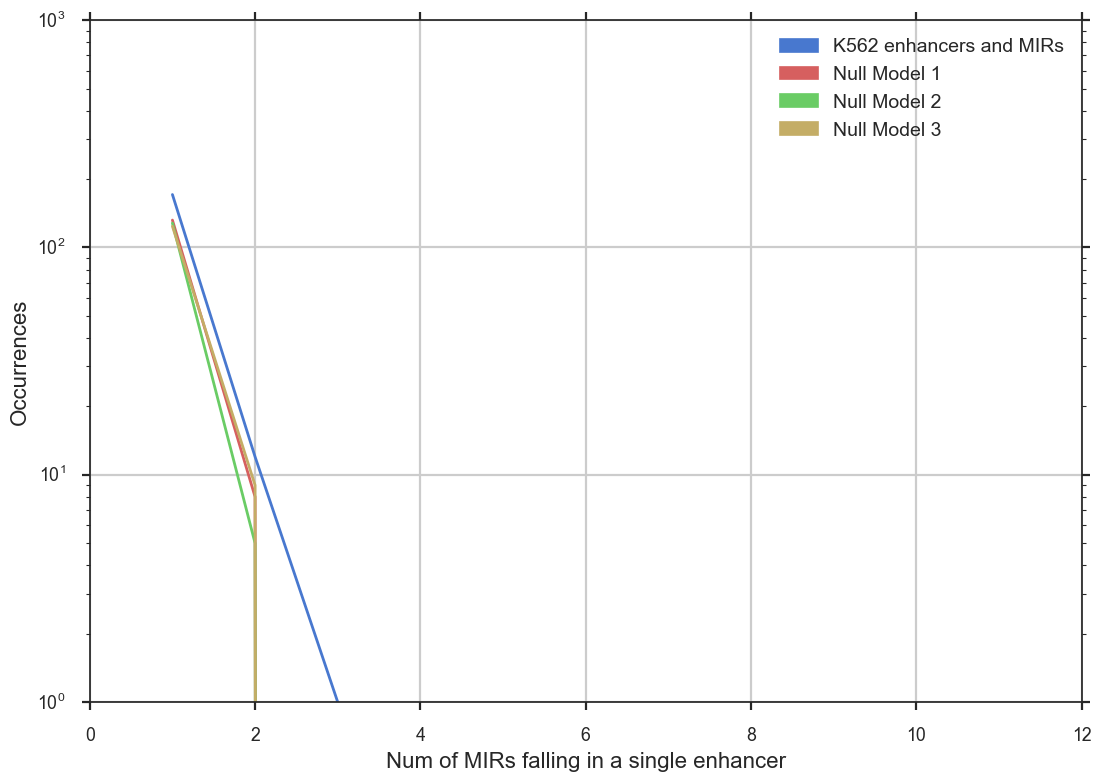

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.patches as mpatches
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 2})

fig = plt.figure()
ax = fig.add_subplot(111)

g1 = plt.plot(occ_base[:12], occ_freq[:12], color='b')
g2 = plt.plot(occ_base[:12], occ_freq_null[:12], color='r')
g3 = plt.plot(occ_base[:12], occ_freq_null_2[:12], color='g')
g4 = plt.plot(occ_base[:12], occ_freq_null_3[:12], color='y')
#g5 = sns.pointplot(x=occ_base[:10], y=occ_freq_complement[:10], color='pink')
ax.axes.set_yscale('log')

ax.grid()

#sns.despine(offset=10, trim=True)

ax.set_ylabel('Occurrences', size=16)
ax.set_xlabel('Num of MIRs falling in a single enhancer', size=16)

blue_patch = mpatches.Patch(color='b', label='K562 enhancers and MIRs')
red_patch = mpatches.Patch(color='r', label='Null Model 1')
green_patch = mpatches.Patch(color='g', label='Null Model 2')
yellow_patch = mpatches.Patch(color='y', label='Null Model 3')

plt.legend(handles=[blue_patch, red_patch, green_patch, yellow_patch], fontsize=14, loc=1)

In [ ]:
import scipy.stats as st
print(st.expon.fit(occ_freq[:10]))
print(st.expon.fit(occ_freq_null[:10]))
print(st.expon.fit(occ_freq_null_2[:10]))
print(st.expon.fit(occ_freq_null_3[:10]))

In [ ]:
# ratios normalized
import matplotlib.pyplot as plt
plt.plot(occ_base[:10], occ_ratio[:10], c='blue')
plt.plot(occ_base[:10], occ_ratio_null[:10], c='red')
plt.plot(occ_base[:10], occ_ratio_null_2[:10], c='green')
ax = plt.plot(occ_base[:10], occ_ratio_null_3[:10], c='yellow')
#plt.plot(occ_base[:10], occ_ratio_complement[:10], c='pink')

plt.show()


In [ ]:
# ratios normalized adjusted (with overlap count)
import matplotlib.pyplot as plt
plt.plot(occ_base[:10], occ_ratio[:10]*real_count, c='blue')
plt.plot(occ_base[:10], occ_ratio_null[:10]*8112, c='red')
plt.plot(occ_base[:10], occ_ratio_null_2[:10]*8108, c='green')
plt.plot(occ_base[:10], occ_ratio_null_3[:10]*8125, c='yellow')
#plt.plot(occ_base[:10], occ_ratio_complement[:10], c='pink')

plt.show()


## Closeness distribution

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
%matplotlib inline
import numpy as np
from joblib import Parallel, delayed
import multiprocessing

def compute_centers(closeness_df):
    closeness_df['centered_locus'] = round(
        (closeness_df['end'] - closeness_df['start'])/2 
        + closeness_df['start']).astype(int)

    closeness_df['close_centered_locus'] = round(
        (closeness_df['close_end'] - closeness_df['close_start'])/2 
        + closeness_df['close_start']).astype(int)

    closeness_df['centered_distance'] = closeness_df['close_centered_locus'] - closeness_df['centered_locus'] 
    return closeness_df

def compute_closeness_df(sorted_bed, sorted_bed_with):
    closeness_columns = ['chrom', 'start', 'end', 'name', 'score', 'strand',
                     'close_chrom', 'close_start','close_end', 
                     'close_name', 'close_score', 'close_strand', 'distance']
    closeness = sorted_bed.closest(sorted_bed_with, D='a')
    closeness_df = closeness.to_dataframe()
    closeness_df.columns = closeness_columns
    closeness_df = compute_centers(closeness_df)
    return closeness_df

def build_closeness_df(bed, bed_with):
    
    closeness_columns = ['chrom', 'start', 'end', 'name', 'score', 'strand',
                         'close_chrom', 'close_start','close_end', 
                         'close_name', 'close_score', 'close_strand', 'distance']
    
    sorted_bed = bed.sort()
    sorted_bed_with = bed_with.sort()
    
    # real on real
    closeness = sorted_bed.closest(sorted_bed_with, D='a', t='all')
    closeness_df = closeness.to_dataframe()
    closeness_df.columns = closeness_columns
    closeness_df = compute_centers(closeness_df)
    
    return closeness_df

In [ ]:
encode_bed = BedTool().from_dataframe(
    encode_bed.to_dataframe()[['chrom', 'start', 'end', 'name', 'score', 'strand']])

In [ ]:
repeat_closeness_df = build_closeness_df(encode_bed, repeat_bed)

In [ ]:
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_df[['centered_distance']], kde=False)
#g1.set_xlim(-5000, 5000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

### Null Model 1 Closeness

In [ ]:
encode_bed_shuffled = encode_bed.shuffle(g=assembly_path)
repeat_closeness_null_df = build_closeness_df(encode_bed_shuffled, repeat_bed)

In [ ]:
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_null_df[['centered_distance']], kde=False)
#g1.set_xlim(-300000, 300000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

### Null Model 2 Closeness

In [ ]:
repeat_bed_shuffled = repeat_bed.shuffle(g=assembly_path)
repeat_closeness_null2_df = build_closeness_df(encode_bed, repeat_bed_shuffled)

In [ ]:
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_null2_df[['centered_distance']], kde=True)
#g1.set_xlim(-300000, 300000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

### Null Model 3 Closeness

In [ ]:
repeat_closeness_null3_df = build_closeness_df(encode_bed_shuffled, repeat_bed_shuffled)

In [ ]:
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_null3_df[['centered_distance']], kde=False)
#g1.set_xlim(-300000, 300000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

### Comparing Closeness Distributions

In [ ]:
centered_distance_distribution = repeat_closeness_df.query("centered_distance >=0")['centered_distance']
centered_distance_distribution_null = repeat_closeness_null_df.query("centered_distance >=0")['centered_distance']
centered_distance_distribution_null_2 = repeat_closeness_null2_df.query("centered_distance >=0")['centered_distance']
centered_distance_distribution_null_3 = repeat_closeness_null3_df.query("centered_distance >=0")['centered_distance']

In [ ]:
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(centered_distance_distribution, kde=True)
#g1.set_xlim(0, 10000)

In [ ]:
freqs, base = np.histogram(centered_distance_distribution, bins=1000)
freqs_null, base_null = np.histogram(centered_distance_distribution_null, bins=base)
freqs_null_2, base_null_2 = np.histogram(centered_distance_distribution_null_2, bins=base)
freqs_null_3, base_null_3 = np.histogram(centered_distance_distribution_null_3, bins=base)

In [ ]:
cumulative = np.cumsum(freqs) /sum(freqs)
cumulative_null = np.cumsum(freqs_null) / sum(freqs_null)
cumulative_null_2 = np.cumsum(freqs_null_2) / sum(freqs_null_2)
cumulative_null_3 = np.cumsum(freqs_null_3) / sum(freqs_null_3)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.patches as mpatches
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 2})

fig = plt.figure()
ax = fig.add_subplot(111)

g1 = plt.plot(base[:-1], cumulative, color='b')
g2 = plt.plot(base_null[:-1], cumulative_null, color='r')
g3 = plt.plot(base_null_2[:-1], cumulative_null_2, color='g')
g4 = plt.plot(base_null_3[:-1], cumulative_null_3, color='y')
#g5 = sns.pointplot(x=occ_base[:10], y=occ_freq_complement[:10], color='pink')
#ax.axes.set_yscale('log')
ax.axes.set_xlim(0, 20000)

ax.grid()

#sns.despine(offset=10, trim=True)

ax.set_ylabel('Closeness cumulate', size=16)
ax.set_xlabel('Distance between cores', size=16)

blue_patch = mpatches.Patch(color='b', label='K562 enhancers and MIRs')
red_patch = mpatches.Patch(color='r', label='Null Model 1')
green_patch = mpatches.Patch(color='g', label='Null Model 2')
yellow_patch = mpatches.Patch(color='y', label='Null Model 3')

plt.legend(handles=[blue_patch, red_patch, green_patch, yellow_patch], fontsize=14, loc=4)

print(st.ks_2samp(cumulative, cumulative_null))

print(st.ks_2samp(cumulative, cumulative_null_2))

print(st.ks_2samp(cumulative, cumulative_null_3))


In [ ]:
import matplotlib.pyplot as plt
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})
sns.set_style("darkgrid")

plt.plot(base[:-1], cumulative, c='blue')
plt.plot(base_null[:-1], cumulative_null, c='red')
plt.plot(base_null_2[:-1], cumulative_null_2, c='green')
#plt.plot(base_null_3[:-1], cumulative_null_3, c='yellow')
plt.show()


## MIR-enhancers: core of enhancers in MIR

In [ ]:
def compute_centers(df):
    df['centered_locus'] = round(
        (df['end'] - df['start'])/2 
        + df['start']).astype(int)

In [ ]:
compute_centers(encode_bed_df)

In [ ]:
encode_bed_cores_df = encode_bed_df.copy()
encode_bed_cores_df['start'] = encode_bed_cores_df['centered_locus']
encode_bed_cores_df['end'] = encode_bed_cores_df['centered_locus']

In [ ]:
encode_bed_cores_df['chrom'].unique()

In [ ]:
encode_bed_cores = BedTool().from_dataframe(encode_bed_cores_df[['chrom', 'start', 'end', 'name', 'score', 'strand']])

In [ ]:
encode_bed_cores.count()

In [ ]:
#MIR-enhancers: core of enhancer in MIR
core_intersection = encode_bed_cores.intersect(repeat_bed, f=1)

In [ ]:
core_intersection.sort().merge().count()

In [ ]:
core_intersection.head()

In [ ]:
counts = []
for i in range(0,20):
    shuffled_encode_bed = encode_bed.shuffle(g=assembly_path)
    shuffled_encode_bed_df = shuffled_encode_bed.to_dataframe()
    compute_centers(shuffled_encode_bed_df)
    shuffled_encode_bed_cores_df = shuffled_encode_bed_df.copy()
    shuffled_encode_bed_cores_df['start'] = shuffled_encode_bed_cores_df['centered_locus']
    shuffled_encode_bed_cores_df['end'] = shuffled_encode_bed_cores_df['centered_locus']
    shuffled_encode_bed_cores_all = BedTool().from_dataframe(shuffled_encode_bed_cores_df[['chrom', 'start', 'end', 'name', 'score', 'strand']])
    core_null_model_intersection_all = shuffled_encode_bed_cores_all.intersect(repeat_bed)
    counts.append(core_null_model_intersection_all.count())

In [ ]:
print(np.mean(counts), np.std(counts))

In [ ]:
z_score =(core_intersection.count() - np.mean(counts))/np.std(counts)
print(z_score)

In [ ]:
p_values = st.norm.sf(abs(z_score))
p_values

In [ ]:
# null model MIR-enhancers
shuffled_encode_bed_cores = encode_bed_cores.shuffle(g=assembly_path)
core_null_model_intersection = shuffled_encode_bed_cores.intersect(repeat_bed, f=1)

In [ ]:
core_null_model_intersection.sort().merge().count()

In [ ]:
def mean_size(bed):
    sample_df = bed.to_dataframe()
    sample_df['size'] = sample_df.apply(lambda row: compute_size(row), axis=1)
    return int(round(sample_df[['size']].mean()))

def build_random_overlap(bed, intervals_size, intervals_num, min_overlap, assembly, df_columns, idx):
    empty_bed = BedTool()
    random_bed = empty_bed.random(l=intervals_size, n=intervals_num,
                                  g=assembly)
    row_array = [idx, bed.intersect(random_bed, f=min_overlap).count()]
    return pd.DataFrame([row_array], columns=df_columns)

def build_shuffled_overlap(bed, bed_overlap_with, min_overlap, assembly, df_columns, idx):
    random_bed = bed.shuffle(g=assembly, chrom=False)
    row_array = [idx, bed.intersect(random_bed, f=min_overlap).count()]
    return pd.DataFrame([row_array], columns=df_columns)

def build_shuffled_overlap_cores(bed, bed_overlap_with, min_overlap, assembly, df_columns, idx):
    random_bed = bed.shuffle(g=assembly_path, chrom=False)
    random_bed_df = random_bed.to_dataframe()
    compute_centers(random_bed_df)
    random_bed_cores_df = random_bed_df.copy()
    random_bed_cores_df['start'] = random_bed_cores_df['centered_locus']
    random_bed_cores_df['end'] = random_bed_cores_df['centered_locus']
    random_bed_cores = BedTool().from_dataframe(random_bed_cores_df[['chrom', 'start', 'end', 'name', 'score', 'strand']])

    row_array = [idx, bed.intersect(random_bed_cores, f=min_overlap).count()]
    return pd.DataFrame([row_array], columns=df_columns)



In [ ]:
from joblib import Parallel, delayed
import multiprocessing

def create_random_overlap_distribution_parallelized(bed, bed_overlap_with, assembly, min_overlap, 
                                                    samples_num,strategy='random', compute_cores=False):
    num_cores = multiprocessing.cpu_count()

    intervals_size = mean_size(bed_overlap_with)
    intervals_num = bed_overlap_with.count()
    columns = ['sample_num', 'size']

    if strategy == 'shuffle':
        if compute_cores == True:
            df_list = Parallel(n_jobs=num_cores)(delayed(build_shuffled_overlap_cores)
                                             (bed, bed_overlap_with, min_overlap, assembly, columns, i)
                                             for i in range(0, samples_num))
        else:
            df_list = Parallel(n_jobs=num_cores)(delayed(build_shuffled_overlap)
                                             (bed, bed_overlap_with, min_overlap, assembly, columns, i)
                                             for i in range(0, samples_num))
    else:
        df_list = Parallel(n_jobs=num_cores)(delayed(build_random_overlap)
                                             (bed, intervals_size, intervals_num, min_overlap, assembly, columns, i)
                                             for i in range(0, samples_num))
    return pd.concat(df_list)

In [ ]:
test_cores_df = create_random_overlap_distribution_parallelized(encode_bed_cores, repeat_bed, assembly_path,
                                                         1e-09, 50, 'random', compute_cores=False)

In [ ]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(test_cores_df[['size']], kde=False, fit=st.norm, bins=20)

In [ ]:
np.mean(test_cores_df['size'])

In [ ]:
z_score =(core_intersection.count() - np.mean(test_cores_df['size']))/np.std(test_cores_df['size'])
print(z_score)

In [ ]:
p_values = st.norm.sf(abs(z_score))
p_values

In [ ]:
test_df = create_random_overlap_distribution_parallelized(encode_bed_cores, repeat_bed, assembly_path,
                                                         1e-09, 1000, 'shuffle')

In [ ]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(test_df[['size']], kde=False, fit=st.norm, bins=20)

In [ ]:
np.mean(test_df['size'])

In [ ]:
np.std(test_df['size'])

In [ ]:
z_score =(core_intersection.count() - np.mean(test_df['size']))/np.std(test_df['size'])
print(z_score)

In [ ]:
st.norm.ppf(0.975)

In [ ]:
import scipy.stats as st
st.norm.ppf(.975)
st.norm.cdf(z_score)

In [ ]:
(1- st.norm.cdf(z_score))*100

In [ ]:
p_values = st.norm.sf(abs(z_score))
p_values

In [ ]:
st.ttest_1samp(a= test_df[['size']], popmean=core_intersection.count())

In [ ]:
st.ttest_1samp(a= test_df[['size']], popmean= np.mean(test_df[['size']]))

In [ ]:
random_sizes = test_df[['size']]
random_sizes.reset_index(inplace=True, drop=True)

In [ ]:
chi2, p = st.chisquare(random_sizes, core_intersection.count() )
msg = "Test Statistic: {}\np-value: {}"
print( msg.format( chi2, p ) )

In [ ]:
encode_bed_cores.sort().fisher(repeat_bed.sort(), f=1e-09, g=assembly_path)

In [ ]:
1-st.hypergeom.cdf(975, 21123880 - 33082, 33082, 593161)

In [ ]:
df_reldist = pd.DataFrame(encode_bed_cores.sort().reldist(repeat_bed.sort()))
df_reldist.T

In [ ]:
df_reldist_random = pd.DataFrame(encode_bed_cores.sort().reldist(repeat_bed.shuffle(g=assembly_path, chrom=False).sort()))

In [ ]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='reldist', y='fraction', data=df_reldist[0:50],  color='r')
g2 = sns.pointplot(x='reldist', y='fraction', data=df_reldist_random[0:50], color='b')

sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g1.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

## Enhancer-MIRs: MIRs in a +/- 4 kbp window around enhancer's core 

In [ ]:
encode_bed_df = encode_bed.to_dataframe()
encode_bed_df['size'] = encode_bed_df.apply(lambda row: compute_size(row), axis=1)

In [ ]:
encode_bed_df['size'].quantile(0.5) == encode_bed_df['size'].median()

In [ ]:
encode_bed_df['size'].std()

In [ ]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(encode_bed_df[['size']], kde=True)

In [ ]:
np.percentile(encode_bed_df[['size']], 50)

In [ ]:
np.arange(0, 1, 0.1)

In [ ]:
encode_bed_df[['size']].quantile(np.arange(0,1,0.1))

In [ ]:
# what if using percentiles in considering enhancer regions? Eg: b=170/2, 251/2, ..., 3123/2
#encode_bed_slop = encode_bed_cores.slop(genome='hg19', b=int(round(3123/2)))

In [ ]:
#compute "enhancers regions" as +/- 4kb from enhancer cores
encode_bed_slop = encode_bed_cores.slop(g=assembly_path, b=4000)

In [ ]:
encode_bed_cores.sort().head()

In [ ]:
encode_bed_slop.sort().head()

In [ ]:
encode_bed_slop.count()

In [ ]:
#enhancer-MIRs: MIR in +/- 4kb from the core of an enhancer 
#(asking the full MIR to be overlapped by an enhancer region)
region_intersection = repeat_bed.intersect(encode_bed_slop, f=1)

In [ ]:
region_intersection.count()

In [ ]:
# null model enhancers-MIRs
shuffled_repeat = repeat_bed.shuffle(g=assembly_path)

In [ ]:
shuffled_repeat.count() == repeat_bed.count()

In [ ]:
null_model_intersection = shuffled_repeat.intersect(encode_bed_slop, f=1)

In [ ]:
null_model_intersection.count()

In [ ]:
test_df2 = create_random_overlap_distribution_parallelized(repeat_bed, encode_bed_slop, assembly_path,
                                                         1, 100)


In [ ]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(test_df2[['size']], kde=False, fit=st.norm, bins=10)

In [ ]:
z_score =(region_intersection.count() - np.mean(test_df2['size']))/np.std(test_df2['size'])
print(z_score)

In [ ]:
import scipy.stats as st
st.norm.ppf(.95)
st.norm.cdf(z_score)

In [ ]:
p_values = st.norm.sf(abs(z_score))
p_values

In [ ]:
st.ttest_1samp(a= test_df2[['size']], popmean= region_intersection.count())

In [ ]:
chi2, p = st.chisquare( test_df2[['size']],region_intersection.count() )
msg = "Test Statistic: {}\np-value: {}"
print( msg.format( chi2, p ) )

In [ ]:
repeat_bed.sort().fisher(encode_bed_slop.sort(), f=1, g=assembly_path)

In [ ]:
#pvalue <- 1-phyper(45, 92, 7518, 1329)
#pvalue = 1-stats.hypergeom.cdf(45, 7518, 92. 1329)
1-st.hypergeom.cdf(66741, 0, 594732, 33082)

In [ ]:
df_reldist = pd.DataFrame(encode_bed_slop.sort().reldist(repeat_bed.sort()))
df_reldist.T

In [ ]:
df_reldist_random = pd.DataFrame(encode_bed_slop.sort().reldist(repeat_bed.sort().shuffle(g=assembly_path, chrom=False).sort()))

In [ ]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='reldist', y='fraction', data=df_reldist[0:50],  color='r')
g2 = sns.pointplot(x='reldist', y='fraction', data=df_reldist_random[0:50], color='b')

sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g1.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

## Densities

In [ ]:
# density
# assuming expected number of MIR-enhancers as
# average genome-wide density of enhancers (enhancers/bp) * total bp length of all MIRs

def compute_expected_number(name1_bed_df, name2_bed_df, name1, name2):
    genome_size = 3095677412 
    #enhancers_bed_df['size'] = enhancers_bed_df['end'] - enhancers_bed_df['start']
    name1_density = len(name1_bed_df) /  genome_size
    name2_bed_df['size'] = name2_bed_df['end'] - name2_bed_df['start']
    name2_len = name2_bed_df['size'].sum()
    print(name1, 'density =', name1_density, '(num of intervals)/(genome bp)')
    print(name2,'length =', name2_len, 'bp')
    print('Expected number of', name2, name1, '=', int(round(name1_density * name2_len)))

In [ ]:
compute_expected_number(encode_bed_df, repeat_bed_df, 'K562 enhancers', 'Sine/MIR')

In [ ]:
def infer_TSS_proximity(row):
    description = row['name']
    if 'Distal' in description:
        return 'Distal'
    if 'Proximal' in description:
        return 'Proximal'

In [ ]:
encode_bed_df['TSS_proximity'] = encode_bed_df.apply(lambda r: infer_TSS_proximity(r), axis=1)

In [ ]:
proximal_df = encode_bed_df.query("TSS_proximity == 'Proximal'")
distal_df = encode_bed_df.query("TSS_proximity == 'Distal'")

In [ ]:
len(distal_df)

In [ ]:
len(proximal_df)

In [ ]:
compute_expected_number(distal_df, repeat_bed_df, "Distal enhancers", "Sine/MIR")

In [ ]:
compute_expected_number(proximal_df, repeat_bed_df, "Proximal enhancers", "Sine/MIR")

In [ ]:
genes_bed = BedTool("../download/genome/knownGene_hg19.bed")

In [ ]:
genes_bed.count()

In [ ]:
genes_bed_df = genes_bed.to_dataframe()

In [ ]:
chrom_list = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chrX',
              'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
              'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chrY', 'chr19',
              'chr22', 'chr21']

genes_bed_df = genes_bed_df.query("chrom in @chrom_list")

In [ ]:
genes_bed_df['chrom'].unique()

In [ ]:
genes_bed = BedTool().from_dataframe(genes_bed_df)

In [ ]:
genes_bed.count()

In [ ]:
compute_expected_number(genes_bed_df, repeat_bed_df, 'Genes', 'Sine/MIR')

In [ ]:
# genic enhancers: enhancers in genic regions
genic_enhancers_bed = encode_bed.intersect(genes_bed, f=1, u=True)

In [ ]:
genic_enhancers_bed.count()

In [ ]:
# genic non-enhancers: genic regions without enhancers
genic_non_enhancers_bed = genes_bed.subtract(genic_enhancers_bed, A=True)

In [ ]:
genic_non_enhancers_bed.intersect(genic_enhancers_bed).count()

In [ ]:
# non-genic enhancers: enhancers outside genic regions
non_genic_enhancers_bed = encode_bed.subtract(genes_bed, f=1, A=True)

In [ ]:
non_genic_enhancers_bed.count()

In [ ]:
non_genic_enhancers_bed.count() + genic_enhancers_bed.count() == encode_bed.count()

In [ ]:
# 200 bp regions around core of enhancers
enhancers_regions_bed = encode_bed_cores.slop(g=assembly_path, b=200)

In [ ]:
enhancers_regions_bed.count()

In [ ]:
genes_bed_df['size'] = genes_bed_df.apply(lambda row: compute_size(row), axis=1)

In [ ]:
genes_bed_df[['size']].quantile(np.arange(0,1,0.1))

In [ ]:
def compute_density_region(bed_in_region_df, region_df):
    region_size = region_df['size'].sum()
    bed_in_region_size = bed_in_region_df['size'].sum()
    
    return bed_in_region_size / region_size

In [ ]:
repeat_reg1_df = repeat_bed.intersect(genic_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [ ]:
repeat_reg2_df = repeat_bed.intersect(genic_non_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [ ]:
repeat_reg3_df = repeat_bed.intersect(non_genic_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [ ]:
repeat_reg4_df = repeat_bed.intersect(enhancers_regions_bed, f=1e-09, u=True).to_dataframe()

In [ ]:
reg1_df = genic_enhancers_bed.to_dataframe()
reg2_df = genic_non_enhancers_bed.to_dataframe()
reg3_df = non_genic_enhancers_bed.to_dataframe()
reg4_df = enhancers_regions_bed.to_dataframe()

reg1_df['size'] =  reg1_df.apply(lambda row: compute_size(row), axis=1)
reg2_df['size'] =  reg2_df.apply(lambda row: compute_size(row), axis=1)
reg3_df['size'] =  reg3_df.apply(lambda row: compute_size(row), axis=1)
reg4_df['size'] =  reg4_df.apply(lambda row: compute_size(row), axis=1)

repeat_reg1_df['size'] = repeat_reg1_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg2_df['size'] = repeat_reg2_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg3_df['size'] = repeat_reg3_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg4_df['size'] = repeat_reg4_df.apply(lambda row: compute_size(row), axis=1)

In [ ]:
d1 = compute_density_region(repeat_reg1_df,reg1_df)
d2 = compute_density_region(repeat_reg2_df,reg2_df)
d3 = compute_density_region(repeat_reg3_df,reg3_df)
d4 = compute_density_region(repeat_reg4_df,reg4_df)

print("density of MIR in genic enhancers", d1)
print("density of MIR in genic non enhancers", d2)
print("density of MIR in non genic enhancers", d3)
print("density of MIR in enhancer regions", d4)

sum_d = d1+d2+d3+d4

print("Normalized Ratios",d1/sum_d, d2/sum_d, d3/sum_d, d4/sum_d)
